In [1]:
from PIL import Image 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

##  Q-1 2-D Fourier Transform and plotting its corresponding spectrum.

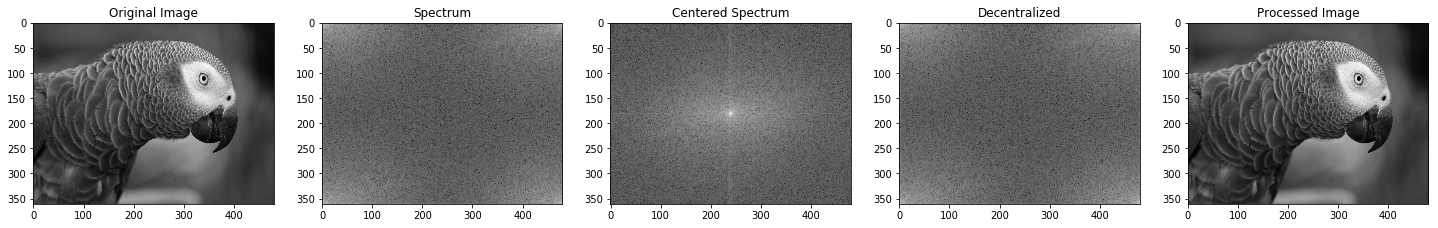

In [58]:
img = Image.open('images/im2.jpg')
img = np.array(img) 
img = img[:,:,0]

plt.figure(figsize=(25,25), constrained_layout=False)

img_c2 = np.fft.fft2(img)
img_c3 = np.fft.fftshift(img_c2)
img_c4 = np.fft.ifftshift(img_c3)
img_c5 = np.fft.ifft2(img_c4)

plt.subplot(151), plt.imshow(img, "gray"), plt.title("Original Image")
plt.subplot(152), plt.imshow(np.log(1+np.abs(img_c2)), "gray"), plt.title("Spectrum")
plt.subplot(153), plt.imshow(np.log(1+np.abs(img_c3)), "gray"), plt.title("Centered Spectrum")
plt.subplot(154), plt.imshow(np.log(1+np.abs(img_c4)), "gray"), plt.title("Decentralized")
plt.subplot(155), plt.imshow(np.abs(img_c5), "gray"), plt.title("Processed Image")

plt.show()

## Q(2,3,4) Implementing Filters Gaussian ,Butterworth, Ideal using selective distance , steps ,

In [72]:
def distance(point1,point2):
    return np.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def ideal_filter_low_pass(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base

def ideal_filter_high_pass(D0,imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base

def butterworth_low_pass(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

def butterworth_high_pass(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1-1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

def gaussian_low_pass(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = np.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def gaussian_high_pass(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - np.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

## Ideal Filter Low Pass

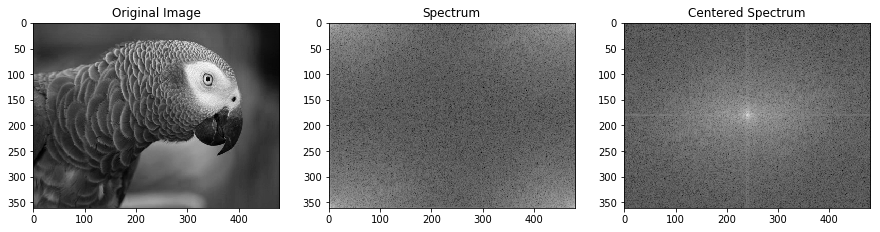

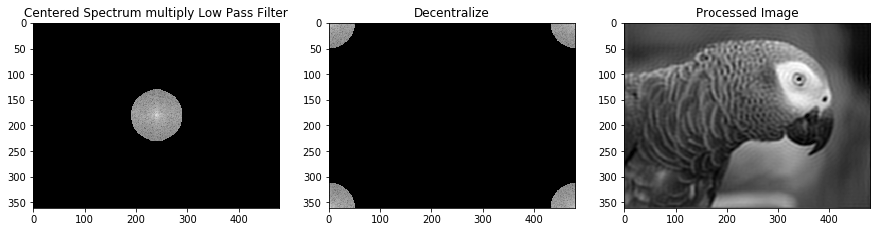

In [107]:
img = Image.open('images/im2.jpg')
img = np.array(img) 
img = img[:,:,0]
plt.figure(figsize=(15, 15), constrained_layout=False)
plt.subplot(131), plt.imshow(img, "gray"), plt.title("Original Image")

original = np.fft.fft2(img)
plt.subplot(132), plt.imshow(np.log(1+np.abs(original)), "gray"), plt.title("Spectrum")

center = np.fft.fftshift(original)
plt.subplot(133), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Centered Spectrum")

plt.figure(figsize=(15, 15), constrained_layout=False)
low_pass_center = center * ideal_filter_low_pass(50,img.shape)
plt.subplot(231), plt.imshow(np.log(1+np.abs(low_pass_center)), "gray"), plt.title("Centered Spectrum multiply Low Pass Filter")

low_pass = np.fft.ifftshift(low_pass_center)
plt.subplot(232), plt.imshow(np.log(1+np.abs(low_pass)), "gray"), plt.title("Decentralize")

inverse_low_pass = np.fft.ifft2(low_pass)
plt.subplot(233), plt.imshow(np.abs(inverse_low_pass), "gray"), plt.title("Processed Image")

plt.show()

## Ideal Filter High Pass

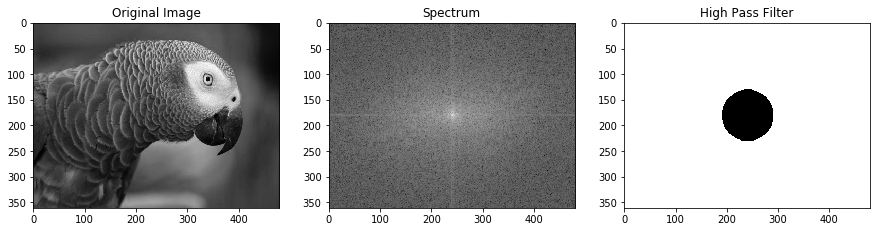

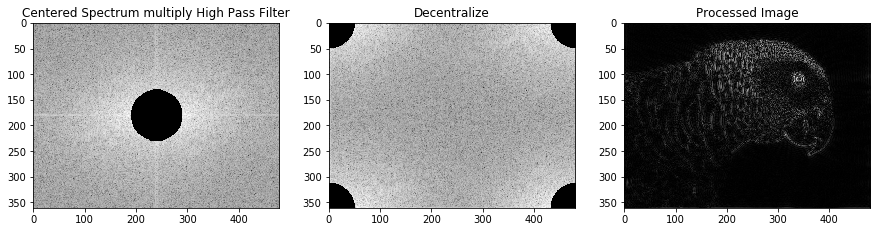

In [106]:
img = Image.open('images/im2.jpg')
img = np.array(img) 
img = img[:,:,0]

original = np.fft.fft2(img)
center = np.fft.fftshift(original)

fig =  plt.figure(figsize=(15, 15), constrained_layout=False)

plt.subplot(131), plt.imshow(img, "gray"), plt.title("Original Image")
plt.subplot(132), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Spectrum")

hp = ideal_filter_high_pass(50,img.shape)
plt.subplot(133), plt.imshow(np.abs(hp), "gray"), plt.title("High Pass Filter")

plt.figure(figsize=(15, 15), constrained_layout=False)
hpc = center * ideal_filter_high_pass(50,img.shape)
plt.subplot(231), plt.imshow(np.log(1+np.abs(hpc)), "gray"), plt.title("Centered Spectrum multiply High Pass Filter")

hp = np.fft.ifftshift(hpc)
plt.subplot(232), plt.imshow(np.log(1+np.abs(hp)), "gray"), plt.title("Decentralize")

inverse_hp = np.fft.ifft2(hp)
plt.subplot(233), plt.imshow(np.abs(inverse_hp), "gray"), plt.title("Processed Image")

plt.show()

## Gaussian Filter Low Pass

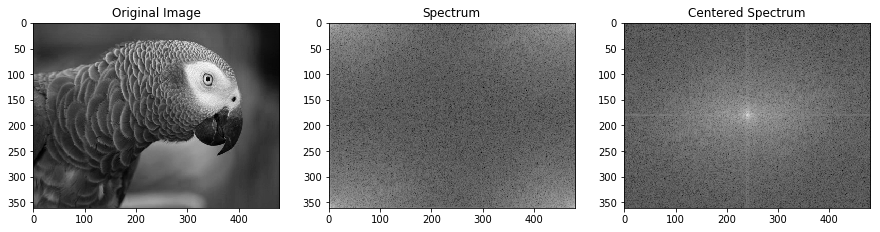

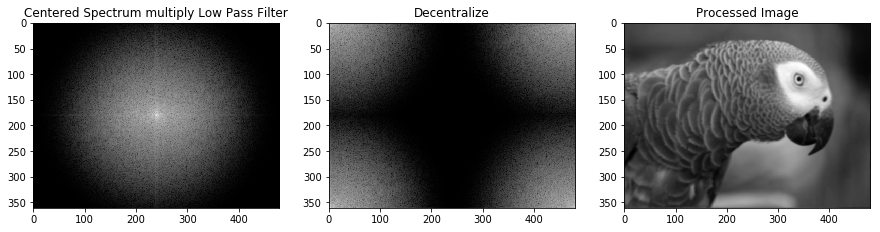

In [104]:
plt.figure(figsize=(15, 15), constrained_layout=False)

img = Image.open('images/im2.jpg')
img = np.array(img) 
img = img[:,:,0]

plt.subplot(131), plt.imshow(img, "gray"), plt.title("Original Image")

original = np.fft.fft2(img)
plt.subplot(132), plt.imshow(np.log(1+np.abs(original)), "gray"), plt.title("Spectrum")

center = np.fft.fftshift(original)
plt.subplot(133), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Centered Spectrum")

plt.figure(figsize=(15, 15), constrained_layout=False)

low_pass_center = center * gaussian_low_pass(50,img.shape)
plt.subplot(231), plt.imshow(np.log(1+np.abs(low_pass_center)), "gray"), plt.title("Centered Spectrum multiply Low Pass Filter")

low_pass = np.fft.ifftshift(low_pass_center)
plt.subplot(232), plt.imshow(np.log(1+np.abs(low_pass)), "gray"), plt.title("Decentralize")

inverse_low_pass = np.fft.ifft2(low_pass)
plt.subplot(233), plt.imshow(np.abs(inverse_low_pass), "gray"), plt.title("Processed Image")

plt.show()

## Gaussian Filter High Pass

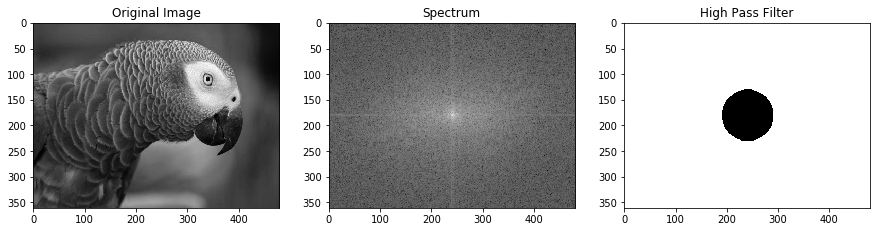

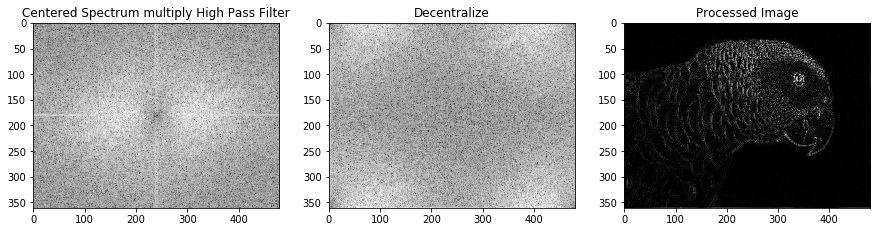

In [103]:
img = Image.open('images/im2.jpg')
img = np.array(img) 
img = img[:,:,0]

original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(15, 15), constrained_layout=False)
plt.subplot(131), plt.imshow(img, "gray"), plt.title("Original Image")
plt.subplot(132), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Spectrum")

hp = ideal_filter_high_pass(50,img.shape)
plt.subplot(133), plt.imshow(np.abs(hp), "gray"), plt.title("High Pass Filter")

plt.figure(figsize=(15, 15), constrained_layout=False)
hpc = center * gaussian_high_pass(50,img.shape)
plt.subplot(231), plt.imshow(np.log(1+np.abs(hpc)), "gray"), plt.title("Centered Spectrum multiply High Pass Filter")

hp = np.fft.ifftshift(hpc)
plt.subplot(232), plt.imshow(np.log(1+np.abs(hp)), "gray"), plt.title("Decentralize")

inverse_hp = np.fft.ifft2(hp)
plt.subplot(233), plt.imshow(np.abs(inverse_hp), "gray"), plt.title("Processed Image")

plt.show()

##  Butterworth Filter Low Pass

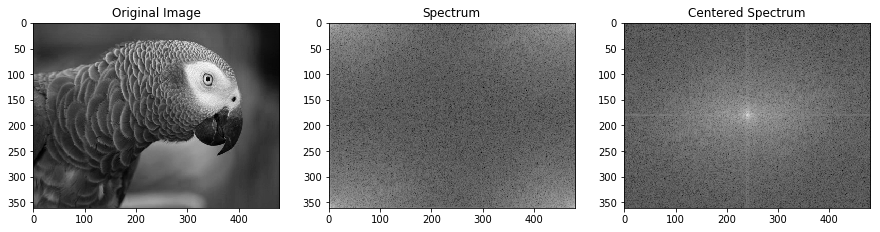

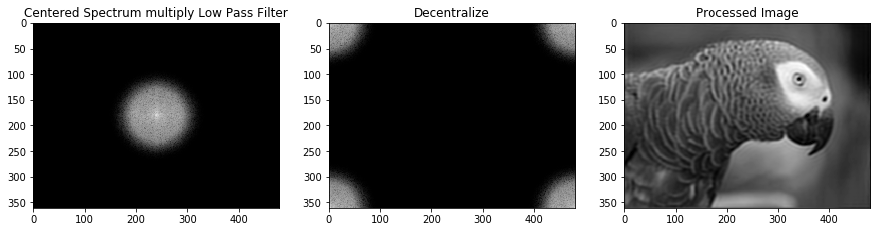

In [102]:
plt.figure(figsize=(15, 15), constrained_layout=False)

img = Image.open('images/im2.jpg')
img = np.array(img) 
img = img[:,:,0]

plt.subplot(131), plt.imshow(img, "gray"), plt.title("Original Image")

original = np.fft.fft2(img)
plt.subplot(132), plt.imshow(np.log(1+np.abs(original)), "gray"), plt.title("Spectrum")

center = np.fft.fftshift(original)
plt.subplot(133), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Centered Spectrum")

plt.figure(figsize=(15, 15), constrained_layout=False)
low_pass_center = center * butterworth_low_pass(50,img.shape,10)
plt.subplot(231), plt.imshow(np.log(1+np.abs(low_pass_center)), "gray"), plt.title("Centered Spectrum multiply Low Pass Filter")

low_pass = np.fft.ifftshift(low_pass_center)
plt.subplot(232), plt.imshow(np.log(1+np.abs(low_pass)), "gray"), plt.title("Decentralize")

inverse_low_pass = np.fft.ifft2(low_pass)
plt.subplot(233), plt.imshow(np.abs(inverse_low_pass), "gray"), plt.title("Processed Image")

plt.show()

##  Butterworth Filter High Pass

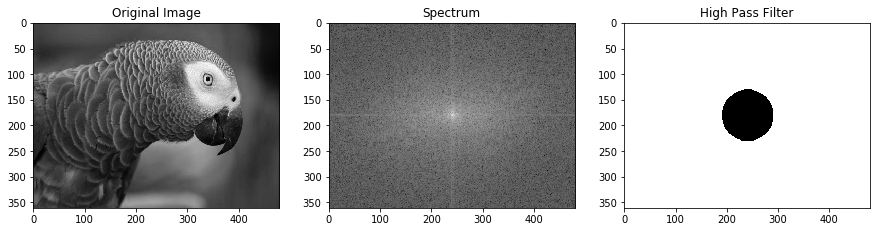

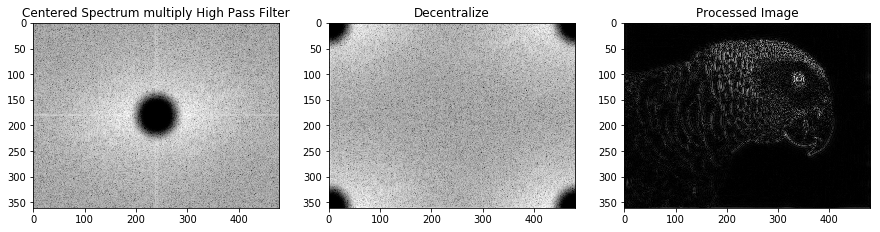

In [100]:
img = Image.open('images/im2.jpg')
img = np.array(img) 
img = img[:,:,0]

original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(15, 15), constrained_layout=False)
plt.subplot(131), plt.imshow(img, "gray"), plt.title("Original Image")
plt.subplot(132), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Spectrum")

hp = ideal_filter_high_pass(50,img.shape)
plt.subplot(133), plt.imshow(np.abs(hp), "gray"), plt.title("High Pass Filter")

plt.figure(figsize=(15,15), constrained_layout=False)
hpc = center *  butterworth_high_pass(50,img.shape,10)
plt.subplot(231), plt.imshow(np.log(1+np.abs(hpc)), "gray"), plt.title("Centered Spectrum multiply High Pass Filter")

hp = np.fft.ifftshift(hpc)
plt.subplot(232), plt.imshow(np.log(1+np.abs(hp)), "gray"), plt.title("Decentralize")

inverse_hp = np.fft.ifft2(hp)
plt.subplot(233), plt.imshow(np.abs(inverse_hp), "gray"), plt.title("Processed Image")

plt.show()

## comparing 3 filter 

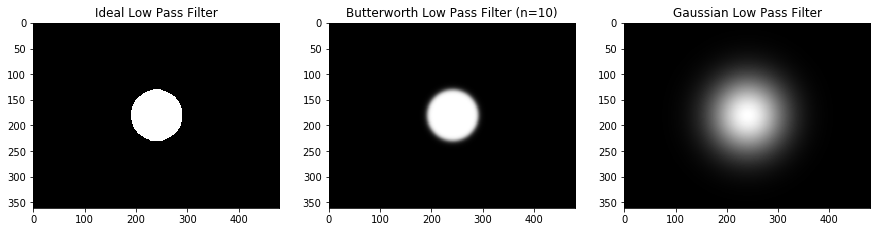

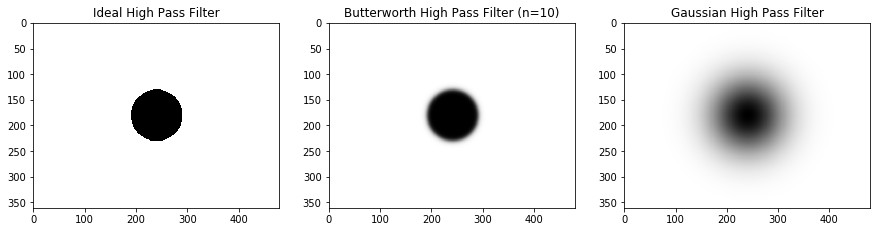

In [101]:
plt.figure(figsize=(15, 15), constrained_layout=False)

IdealLP = ideal_filter_low_pass(50,img.shape)
plt.subplot(131), plt.imshow(IdealLP, "gray"), plt.title("Ideal Low Pass Filter")

ButterLP = butterworth_low_pass(50,img.shape,10)
plt.subplot(132), plt.imshow(ButterLP, "gray"), plt.title("Butterworth Low Pass Filter (n=10)")

GaussianLP = gaussian_low_pass(50,img.shape)
plt.subplot(133), plt.imshow(GaussianLP, "gray"), plt.title("Gaussian Low Pass Filter")

plt.figure(figsize=(15, 15), constrained_layout=False)
IdealHP = ideal_filter_high_pass(50,img.shape)
plt.subplot(231), plt.imshow(IdealHP, "gray"), plt.title("Ideal High Pass Filter")

ButterHP = butterworth_high_pass(50,img.shape,10)
plt.subplot(232), plt.imshow(ButterHP, "gray"), plt.title("Butterworth High Pass Filter (n=10)")

GaussianHP = gaussian_high_pass(50,img.shape)
plt.subplot(233), plt.imshow(GaussianHP, "gray"), plt.title("Gaussian High Pass Filter")

plt.show()

## Ideal Notch Filter 

In [13]:
from scipy import fftpack
import scipy.fftpack as fp
import pathlib
def get_fshift_and_save_dft(img):
    img = np.asarray(img)
    img = img[:,:,0]
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    dft = 20 * np.log(np.abs(fshift))
    return fshift, dft, img

def apply_filter(fshift, points, d0):
    m = fshift.shape[0]
    n = fshift.shape[1]
    for u in range(m):
        for v in range(n):
            for d in range(len(points)):
                u0 = points[d][0]
                v0 = points[d][1]
                u0, v0 = v0, u0
                d1 = pow(pow(u - u0, 2) + pow(v - v0, 2), 1)
                d2 = pow(pow(u + u0, 2) + pow(v + v0, 2), 1)
                if d1 <= d0 or d2 <= d0:
                    fshift[u][v] *= 0.0
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return img_back
   
    #matplotlib.image.imsave("img.jpg", img_back, cmap = "gray")

In [40]:
%matplotlib tk
img = Image.open("images/1.png")
fshift,dft,img = get_fshift_and_save_dft(img)
fig = plt.figure(figsize=(15, 15), constrained_layout=False)
plt.subplot(132), plt.imshow(dft, "gray"), plt.title("dft")
freq = 5
points = []
def onclick(event):
    ix, iy = event.xdata, event.ydata
    print(ix, iy)
cid = fig.canvas.mpl_connect('button_press_event', onclick)


182.83333333333326 126.24759259259258
127.42592592592587 180.39574074074073


(<matplotlib.axes._subplots.AxesSubplot at 0x1ec9af9ed68>,
 Text(0.5,1,'filtered'))

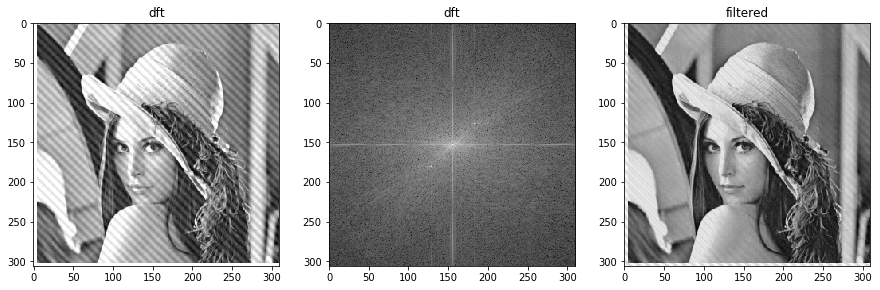

In [43]:
%matplotlib inline
points = [[182.83333333333326, 126.24759259259258], [127.42592592592587, 180.39574074074073]]
points = np.asarray(points)
img_back =apply_filter(fshift, points, 10)
plt.subplot(131), plt.imshow(img,"gray"), plt.title("original")
plt.subplot(132), plt.imshow(dft, "gray"), plt.title("dft")
plt.subplot(133), plt.imshow(img_back, cmap = "gray"), plt.title("filtered")